# Python for Environmental Science Day 6
## Topics
* Pandas


## Disclaimer
Foremost, I have to inform you that [pandas](https://www.quora.com/Why-is-the-pandas-Python-library-named-pandas) has nothing to do with [pandas](https://en.wikipedia.org/wiki/Giant_panda). Sorry about that. Secondly, I have to tell you that pandas can be a bit confusing at times and I still haven't figured out everything myself. However, I will give my best to teach you the things I know and those I should know about pandas. 

This notebook might take a bit longer then the days before!

## What is pandas?
You know [spreadsheets](https://en.wikipedia.org/wiki/Spreadsheet), right? 

<img src="https://i.pinimg.com/originals/04/5b/91/045b9193b35a53ea001963032614e599.jpg" alt="Drawing" style="width: 250px;"/ align="left">


Basically pandas does the same, but a bit more abstract and way better. Today you will learn how to read data into pandas and work with it in meaningful ways. When you import pandas it is convention to do it like this:

In [ ]:
import pandas as pd

First, take a look at [this video](https://youtu.be/CmorAWRsCAw) to get a introduction to pandas and why it is useful.

### Practice Questions
* What is the advantage of pandas of regular spreadsheets like excel?
* What is data wrangling?

In the following sections we will use the well known [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to explore pandas a bit more.

In [ ]:
# Do not worry if those lines confuse you. 
# They are only needed to get some data to work with and you do not need to understand them.
# If you are curious take a look here:
# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
import numpy as np
from sklearn import datasets

def load_iris():
    """Loads the iris dataset and returns it as a dataframe"""
    iris = datasets.load_iris()
    iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                         columns= iris['feature_names'] + ['target'])
    return iris_df

iris_df = load_iris()
iris_df.head()

As you can see it looks pretty similar to excel at first glance.

After watching the video try to calculate the median of the column "sepal width (cm)".

## Rows and Columns
As I always confuse them, here is a little reminder on rows and columns:

<img src="https://qph.fs.quoracdn.net/main-qimg-2c10ea6a9bdf9c6ae2c9031fb15c6723" alt="Drawing" style="width: 250px;"/ align="left">


## Dataframe Basics
Take a look at [this video](https://youtu.be/F6kmIpWWEdU) to get a basic overview of the dataframe data strucure. 


### Practice Questions
* What is the "shape" of a dataframe?
* How can you get the column names of a dataframe?
* What is the difference between a series and a dataframe?

### Simple Selection in Dataframes
When you have collected and cleaned your data you want to do something with it. The first thing is usually looking at it. So lets take a look at a few ways to access your dataframe.
* Access a certain subset of rows

In [ ]:
# Simply use slicing, as you already learned with lists
iris_df[1:3]

* Access a column

In [ ]:
# Simply use the name in square brackets
# The .head() function is not neccesary for this, but it is nicer to look at. Try the line without it. 
iris_df["sepal width (cm)"].head()

The thing we got back from pandas when we asked for a certain column was a series. 

In [ ]:
type(iris_df["sepal width (cm)"])

This ought not confuse you. [Simply put](https://stackoverflow.com/questions/26047209/what-is-the-difference-between-a-pandas-series-and-a-single-column-dataframe) "a series is a datastructure for a single column of a dataframe" and a dataframe "can be thought of as a dict-like container for series objects".

* Access several columns at once

In [ ]:
# Simply create a list of the columns you want to access
cols = ["sepal width (cm)", "sepal length (cm)"]
iris_df[cols].head()

### Simple Calculations
As the dataframe contains data you want to work with, the most powerful property of pandas is the easy usage of functions to calculate new informations. The most useful to get a quick overview for a dataframe is .describe(), which will give you the most common describers of data like mean or max values.

In [ ]:
iris_df.describe()

You can also do this for specific describers and columns.

In [ ]:
iris_df["sepal width (cm)"].std()

### Boolean Indexing
Often you want to filter for a specific value. For example you only want to get all the rows where the sepal width is above 4. This is integrated in pandas by the so called boolean indexing. For this you have to access the dataframe as usual, but instead of typing the column you give it a boolean expression.

In [ ]:
iris_df[iris_df["sepal width (cm)"] > 4]

You can combine boolean indexing with regular a regular access on certain columns. So in the following case you would get the petal width for all flowers were the sepal width is above 4.

In [ ]:
iris_df["petal width (cm)"][iris_df["sepal width (cm)"] > 4]

### Practice Questions
* When is it impossible to access a column with the statement df.columnname, but you have to type df[columnname] instead?
* What is the index of a dataframe and what types can it have?
* What is the keyword "inplace" used for?

### Exercise 1
Use the code provided above to read in the iris dataset and do the following:
* Calculate the minimal value for the column 'petal length'
* Select all rows where target is 0 and use the describe function on this
* Create a slice of the last two rows of the dataframe

<img src="https://memegenerator.net/img/instances/73988552/pythonpandas-is-easy-just-do-such-and-such.jpg" alt="Drawing" style="width: 250px;"/ align="left">

## Creating Dataframes from Data
Pandas allows you to create dataframes in very different ways. But we can savely assume that most of the time you will read in .csv files, as they are the most common format for raw data. First let us create a csv file we can play around with.

In [ ]:
# Again, you do not need to get this code. But it will not hurt if you try.
import numpy as np
import pandas as pd
import datetime
import random

def create_csv():
    """Creates a dataframe with random data and saves it as a csv"""
    # Create a dataframe with only NaN
    df = pd.DataFrame(np.nan, index=range(50), columns=range(4))
    # Fill the columns
    for i, column in enumerate(df.columns):
        # Make the first column retain some NaN
        if i == 0:
            fill_till = random.randint(10, random.randint(10, 51))
            df.loc[:fill_till-1,column] = np.random.randint(low=random.randrange(100),
                                                            high=random.randrange(100, 1000),
                                                            size=fill_till)
        # Fill all others completely
        else:
            df.loc[:,column] = np.random.randint(low=random.randrange(100),
                                                 high=random.randrange(100, 1000),
                                                 size=50)
    # Replace the NaN
    df.fillna(value=-999, inplace=True)
    # Give the columns new names
    df.columns = ["Probe1", "Probe2", "Probe3", "Probe4"]    
    # Create a datetime index
    times = pd.DatetimeIndex(freq='2s', start=datetime.datetime.now(), periods=50)
    df.index = times
    df.index.name = "Datetime"
    # Write to a file
    df.to_csv("probe_measurements.csv", sep=";")            
            
create_csv()

Execute this code and in your directory a file named "probe_measurements.csv" should pop up. Now we want to read it in again. We have to make sure we get the seperator right and find a way to handle the NaNs. 

In [ ]:
def read_in_csv(file):
    """Reads in the file we just created"""
    df = pd.read_csv(file, sep=";", header=0, index_col=0, na_values=-999)
    return df

df = read_in_csv("probe_measurements.csv")
df.tail(15)

The pandas method read_csv() has [quite a lot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) of additional keywords to play around with. For our easy example we only needed four, but a bit more untidy data might force you to play around a lot more. For a little more information on how to create dataframes take a look [here](https://youtu.be/3k0HbcUGErE).

### Practice Questions
* What would happen if we would not define **na_values=-999**?
* What does df.tail() do?
* What kinds of Dataframe creation methods exist beside read_csv()

### Exercise 2
Download [this file](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls), which is provided by UN and contains energy indicators for 2013. Your task is to create a dataframe called "energy" that contains all entries in the right format. You should consider the following:
* This is an Excel file, not a csv (If this confuses you a lot take a look at [this video](https://youtu.be/-0NwrcZOKhQ?t=16m))
* The upper part is unecessary and you should not read it in (do not delete parts of the file)
* The first two columns contain no information
* Make sure all missing data is saved as NaN
* There are several countries with numbers and/or parenthesis in their name. Be sure to remove these.
    * 'Bolivia (Plurinational State of)' should be 'Bolivia'
    * 'Switzerland17' should be 'Switzerland'
    
Finally, let pandas describe the dataset for you.
    
Hint: This exercise will be a bit challenging. Do not lose heart if this takes some time to sort out. 

Inspired by "Introduction to Data Science" MOOC by the University of Michigan

## Save Dataframes as Files
As stated above, you will mainly need to know how to save dataframes as csv files. First take a look at [this video](https://youtu.be/-0NwrcZOKhQ?t=11m49s) (you can stop at 15.30 Min). As you see writing to csv is not very complicated. The main syntax is:

In [ ]:
df.to_csv("name.csv")

But as the method to read_csv(), to_csv() has [quite a lot of keyword arguments](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html). I will not go into detail here, as most are for edge cases, where you require a certain format. 

You can also save files as excel type, but this is a bit more complicated if you have to use several sheets.

### Practice Questions
* Which kinds of files can pandas create in addition to csv and excel?

### Exercise 3
Write the energy dataframe you created in the last exercise to a csv file in a more easily readable format than originally provided.

## Advanced Selection in Dataframes
We already learned how to access rows or columns and now we learn to access both rows and columns at once. Pandas provides three main methods for this:
* .loc[ ]  is for selecting the rows by the index and the columns by their names.
* .iloc[ ]  is for selecting the rows and columns by their integer position (i for integer)
* .ix[ ] mixes the two above by allowing you using labels and integers together

For an overview take a look at [this video](https://youtu.be/xvpNA7bC8cs). Let's try the different methods step by step. 
 
### .loc[ ] Examples
So the basic syntax is:

In [ ]:
df.loc[row_index_labels, column_name_labels]

So for example we want to get the first ten rows and the data from Probe 1 and Probe 2 from our dataframe created above. 

In [ ]:
index = df.index
first_ten = index[:10]
print(df.loc[first_ten, ["Probe1", "Probe2"]])

Or we could want to get all rows for Probe 1.

In [ ]:
print(df.loc[:, "Probe1"])

Now you try. Use .loc[ ] to get rows 30 to 40 for all Probes.

You can also use .loc[ ] with boolean expressions, which comes in handy sometimes. You use it in the same way as before. Just tell pandas the rows you want and then the columns. Simply switch the labels with boolean expressions.

In [ ]:
print(df.loc[df["Probe2"] > 500, "Probe3"])

### Practice Questions
* Describe the rules of the output of the statement above with your own words.

### .iloc[ ] Examples
Basic syntax:

In [ ]:
df.iloc[numbers_of_rows, numbers_of_columns]

For example we want to get rows 15 to 25 and the columns in positon 2 and 3.

In [ ]:
print(df.iloc[15: 25, [2, 3]])

### .ix[ ] Examples
As stated above .ix[ ] allows you to combine what we have learned so far with iloc and loc. So for example you want to access the first ten rows and the column of Probe 3. You should not get to used to this way of indexing as it will soon be [removed from pandas](https://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated), but you should not it exists as you might see it in other peoples code.

In [ ]:
df.ix[:10, "Probe3"]

### Exercise 4
Read in the energy.csv you created in the last exercise and do the following using loc or iloc (and some other things we learned so far):
* Display the first five countries with all columns.
* Display all countries that begin with "A" and calculate the mean values for all columns.
* Display the renewable energy production of the countries 50 to 100 in ascending order.


### Copies and Views
When using all those different ways to access parts of dataframes confusion can arise, as some methods create copies (you get a new dataframe) and some other create a view (you still work with the old dataframe, but only see a part of it). However [general rules](https://stackoverflow.com/questions/23296282/what-rules-does-pandas-use-to-generate-a-view-vs-a-copy) exist. For convenience I made a 'copy':

"

Here are the rules, subsequent override:
* All operations generate a copy
* If **inplace=True** is provided, it will modify in-place; only some operations support this
* An indexer that sets, e.g. **.loc/.ix/.iloc/.iat/.at** will set inplace.
* An indexer that gets on a single-dtyped object is almost always a view (depending on the memory layout it may not be that's why this is not reliable). This is mainly for efficiency. (the example from above is for **.query**; this will always return a copy as its evaluated by **numexpr**)
* An indexer that gets on a multiple-dtyped object is always a copy.

"

### Practice Questions
* Is there a 'best' way to access a dataframe?
* What is the difference between a copy and a view?

## Grouping Dataframes
Looking at data often requires you to make a selection, as you only want to look at certain cases and not the whole dataset. For example in the energy dataset we used it might be interesting to look at the data grouped by continent. Pandas provides a very useful tool for this: groupby(). Take a look at [this video](https://youtu.be/Wb2Tp35dZ-I) to get an introduction. As the dataframes we have used so far do not have any categories to group them by we will take a look at [another dataset](https://www.kaggle.com/abcsds/pokemon). (You will have to create a Kaggle account to download it, if you do not want to use your own mail adress for this, try [this](https://www.10minutemail.com) disposable one). Now, lets read it in.

In [26]:
import pandas as pd
# You have to download the pokemon.csv to the same directory as this notebook
pokemon = pd.read_csv("pokemon.csv")
# Include="all" so categorical data gets included
pokemon.describe(include="all")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Milotic,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


As explained in the video groupby() creates a key and a value after your specifications. The keys are the categories you defined and the values is the data that relates to that key. So for example if you group our dataframe by the 'Type 1' your Keys will be Grass, Fire, Water and so forth and your values will be all pokemon that fall under this category.

In [ ]:
for key, value in pokemon.groupby("Type 1"):
    print("\n\n" + key)
    print(value)

groupby() is also quite handy if you want to calculate metrics of your your groups. The fancy part here is that you do not have to access all groups seperately. groupby() objects directly allow to call the metrics on themselves.

In [29]:
groupby_object = pokemon.groupby("Type 1")
groupby_object.mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In this case we calculated the mean for all columns. Obviously taking the mean of such things as the legendary status of a pokemon does not make much sense. Therefore, we can also apply this only to the columns we are interested in.

In [20]:
groupby_object[["Attack", "Defense"]].mean()

,Attack,Defense
Type 1,,
Bug,70.971014,70.724638
Dark,88.387097,70.225806
Dragon,112.125000,86.375000
Electric,69.090909,66.295455
Fairy,61.529412,65.705882
Fighting,96.777778,65.925926
Fire,84.769231,67.769231
Flying,78.750000,66.250000
Ghost,73.781250,81.187500


As a little teaser for tomorrow, pandas can also create figures relatively easy.

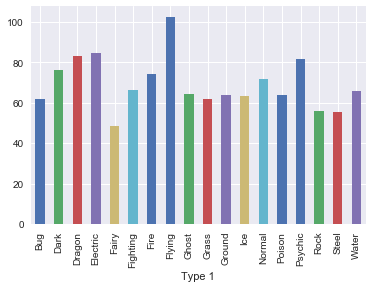

In [42]:
# The next line is needed to create the figure in this notebook
%matplotlib inline
groupby_object["Speed"].mean().plot(kind="bar")

### Practice Questions
* In what form does groupby() return its results?


### Exercise 5
Use the pokemon dataframe to do the following:
* Use groupby to print all the individual pokemon names belonging to teach Type 1
* Group the dataframe by Generation and save results in a dictionary, with the generation as key and the dataframe of the generation as value
* Print the amount of pokemons in each Type 1

## Combining Dataframes (concat and merge)
Often you come across that you have several dataframes that contain data that relates to each other. Now pandas allows you combine those dataframes with two main methods:
* [concat](https://youtu.be/WGOEFok1szA): mainly used to combine dataframes simply by adding them along the rows or columns
* [merge](https://youtu.be/h4hOPGo4UVU): mainly used to combine dataframes in such a way that only certain parts of them are combined. There are four main kinds of merges (often also called joins)

<img src="http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png
" alt="Drawing" style="width: 400px;"/ align="left">


So to break it down, one could say that concat is for combining complete dataframes, wihout changing them, while merge allows you to specify how they should be combined.


### concat
Here is a little example. We have two pandas series. One containig the attack values of all pokemon and one containing all the defense values. 

In [47]:
pokemon_attack = pokemon["Attack"]
pokemon_defense = pokemon["Defense"]

Now we want to combine those two into one dataframe using concat.

In [50]:
att_def = pd.concat([pokemon_attack, pokemon_defense])
att_def

0       49
1       62
2       82
3      100
4       52
5       64
6       84
7      130
8      104
9       48
10      63
11      83
12     103
13      30
14      20
15      45
16      35
17      25
18      90
19     150
20      45
21      60
22      80
23      80
24      56
25      81
26      60
27      90
28      60
29      85
      ... 
770     65
771     75
772     57
773    150
774     35
775     53
776     70
777     91
778     48
779     76
780     70
781     70
782     70
783     70
784    122
785    122
786    122
787    122
788     85
789    184
790     35
791     80
792     95
793     95
794    121
795    150
796    110
797     60
798     60
799    120
Length: 1600, dtype: int64

As you can see we now have a series with 1600 instead of 800 entries. But this is not what we wanted isn't it? We want two columns with 800 entries each. The problem we stumbled across is that concat can either combine via rows or columns. As the default is along the rows and we did not specify otherwise, it did just that. So if we want to concat along the columns we have to tell pandas.

In [51]:
att_def = pd.concat([pokemon_attack, pokemon_defense], axis=1)
att_def

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
5,64,58
6,84,78
7,130,111
8,104,78
9,48,65


This creates the dataframe we wanted to get!

### merge
First let us create two dataframes, each containing parts of the pokemon dataset



In [56]:
pok_df1 = pokemon.iloc[:12,:3]
pok_df1

,#,Name,Type 1
0,1,Bulbasaur,Grass
1,2,Ivysaur,Grass
2,3,Venusaur,Grass
3,3,VenusaurMega Venusaur,Grass
4,4,Charmander,Fire
5,5,Charmeleon,Fire
6,6,Charizard,Fire
7,6,CharizardMega Charizard X,Fire
8,6,CharizardMega Charizard Y,Fire
9,7,Squirtle,Water


In [55]:
pok_df2 = pokemon.iloc[5:10,3:]
pok_df2

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,NaN,405,58,64,58,80,65,80,1,False
6,Flying,534,78,84,78,109,85,100,1,False
7,Dragon,634,78,130,111,130,85,100,1,False
8,Flying,634,78,104,78,159,115,100,1,False
9,NaN,314,44,48,65,50,64,43,1,False


Now let us explore how different types of merges give us different results. As the only thing both dataframes have in common is the index, we have to merge using it.

In [60]:
merged_df = pd.merge(pok_df1, pok_df2, how="inner", left_index=True, right_index=True)
merged_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


As we did a inner join, only those entries entries are in the dataframe that existed in both dataframes. In this case this equals to the second dataframe. Now lets look at an outer merge. 

In [61]:
merged_df = pd.merge(pok_df1, pok_df2, how="outer", left_index=True, right_index=True)
merged_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Ivysaur,Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Venusaur,Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,VenusaurMega Venusaur,Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Charmander,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Charmeleon,Fire,NaN,405.0,58.0,64.0,58.0,80.0,65.0,80.0,1.0,False
6,6,Charizard,Fire,Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0,1.0,False
7,6,CharizardMega Charizard X,Fire,Dragon,634.0,78.0,130.0,111.0,130.0,85.0,100.0,1.0,False
8,6,CharizardMega Charizard Y,Fire,Flying,634.0,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False
9,7,Squirtle,Water,NaN,314.0,44.0,48.0,65.0,50.0,64.0,43.0,1.0,False


Now we get a larger dataframe, but have many 'NaN' as pandas has no information to fill the gaps with. 

Here is an [additional article](http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/) on merging if you want to get a bit more information.

### Practice Questions
* What is the difference between concat and merge?
* What is the difference between an outer and an inner join?
* What are the consequences of using an outer or an inner join?
* What does the axis keyword argument specify?

### Exercise 6
The following codes produces a list of several dataframes. Concatenate them once along the rows and once along the columns. Which one makes more sense?

In [64]:
import random
def create_dfs():
    """Creates several small dataframes and returns them in a list"""
    df_list = []
    for i in range(3):
        df = pd.Dataframe({
            "probe": [1, 2, 3],
            "humidity": [random.random(), random.random(), random.random()],
            "temperature": [random.randint(-100,100), random.randint(-100,100), random.randint(-100,100)]
        })
    return df_list

### Exercise 7
Merge the df_list in a meaningful way. 

So after this rather long day, maybe you can relate a bit more to this:

<img src="https://memegenerator.net/img/instances/51740682/you-are-a-python-lover-if-pandas-doesnt-mean-but-httppandaspydataorg.jpg
" alt="Drawing" style="width: 400px;"/ align="left">
